# Programación 201

### Ejercicio 1

Carga los datos desde el archivo `netflixtitles.csv` , que puedes encontrar en la carpeta `data`, en un *dataframe*. Este conjunto de datos recoje información sobre películas y séries de TV de Netflix (https://www.kaggle.com/shivamb/netflix-shows) hasta el 2019.  

Muestra el número de filas del *dataframe* y los nombres de las columnas.

*Consideraciones:*

*  Muestra únicamente la información pedida en el enunciado.


In [170]:
# Respuesta
import pandas as pd
import numpy as np

In [171]:
netflix = pd.read_csv("C:/Users/raque/Documents/GitHub/NEOLAND-DS2020-datalabs/02-python-201/data/netflixtitles.csv")

In [172]:
# Obtenemos el número de filas 
len(netflix.index)

6234

In [173]:
# Y el nombre de las columnas:
list(netflix.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

### Ejercicio 2

Agrupa los datos cargados en el ejercicio 1 por **año** y, para cada año, muestra el número total de películas (*Movies*) y series de TV (*TV Show*) por separado. 

**Nota:** Al Notebook de teoría hemos visto cómo calcular la media de una agrupación de datos. Para resolver este ejercicio necesitarás investigar cómo contar (*count*) todos los valores de una columna en una agrupación. Te puede ser de utilidad la función [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) de pandas, la que nos permite aplicar diferentes funciones a una columna en un ```groupby```.


In [174]:
# Agrupamos los datos obtenidos por año y mostramos el número total de películas y series juntas:

netflix.groupby("release_year")["type"].count()



release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2016     830
2017     959
2018    1063
2019     843
2020      25
Name: type, Length: 72, dtype: int64

In [175]:
# Y ahora separamos el número total de películas y de series con aggregate:

netflix.groupby(["release_year","type"]).aggregate(["count"])

,,show_id,title,director,cast,country,date_added,rating,duration,listed_in,description
,,count,count,count,count,count,count,count,count,count,count
release_year,type,,,,,,,,,,
1925,TV Show,1,1,0,0,0,1,1,1,1,1
1942,Movie,2,2,2,1,2,2,2,2,2,2
1943,Movie,3,3,3,0,3,3,3,3,3,3
1944,Movie,3,3,3,1,3,3,3,3,3,3
1945,Movie,3,3,3,1,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
2018,TV Show,417,417,28,360,360,416,417,417,417,417
2019,Movie,400,400,377,355,350,400,400,400,400,400


### Ejercicio 3

Muestra las películas estrenadas el _2019_ que tienen una duración superior a _100_ minutos. 

**Nota:** Al Notebook de teoría hemos visto operaciones básicas de filtrado. Para resolver este ejercicio necesitarás investigar cómo aplicar condiciones más complejas. 

**Nota 2:** Los valores de la columna de duración (*duration*) son strings, ya que combinan números y letras. Por lo tanto, se tienen que transformar a int una vez se haya construido el subset de datos de películas. Te puede ser de utilidad la función [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) de pandas.
 


In [176]:
netflix.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [177]:
# Respuesta
# primero hago un filtro con las películas que se estrenaron en 2019
df1 = netflix[(netflix.type == "Movie") & (netflix.release_year == 2019)]


In [178]:
# y veo las primeras filas
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,"September 6, 2019",2019,TV-MA,125,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...
38,81132437,Movie,Kill Me If You Dare,Şenol Sönmez,"Murat Boz, Seda Bakan, Açelya Topaloğlu, Özgür...",NaN,"September 6, 2019",2019,TV-14,100,"Comedies, International Movies, Romantic Movies","Bogged down with money problems, a couple grow..."
44,81176188,Movie,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",NaN,"September 5, 2019",2019,TV-G,10,Documentaries,Barack and Michelle Obama talk with directors ...
57,81078908,Movie,The World We Make,Brian Baugh,"Caleb Castille, Rose Reid, Kevin Sizemore, Gre...",United States,"September 4, 2019",2019,PG,108,"Dramas, Romantic Movies",A teenage equestrian and a local football play...


In [180]:
# Voy a ver los valores de duration:
pd.unique(netflix["duration"])

array(['90', '94', '1 Season', '99', '110', '60', '78', '95', '58', '62',
       '65', '61', '135', '98', '96', '79', '113', '80', '77', '112',
       '106', '102', '114', '125', '142', '133', '100', '86', '146', '10',
       '122', '126', '116', '130', '70', '128', '88', '108', '93', '64',
       '107', '92', '111', '103', '40', '85', '72', '45', '89', '24',
       '127', '163', '117', '42', '104', '75', '82', '38', '97', '81',
       '91', '152', '87', '121', '101', '119', '83', '182', '124', '63',
       '139', '171', '84', '69', '76', '41', '153', '141', '52', '137',
       '132', '157', '109', '105', '25', '71', '123', '67', '140', '138',
       '149', '47', '68', '148', '54', '151', '155', '162', '28', '160',
       '29', '57', '46', '73', '74', '118', '66', '14', '20', '115', '48',
       '168', '144', '161', '55', '56', '51', '50', '23', '205', '190',
       '131', '22', '59', '150', '159', '145', '158', '143', '154', '147',
       '129', '214', '136', '134', '44', '156', '30',

In [181]:
# cambio duration a int y luego elijo las que duran más de 100 minutos
df1["duration"] = df1["duration"].astype(int)


<ipython-input-181-7235c6df711f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["duration"] = df1["duration"].astype(int)


In [182]:
 
df1[df1.duration > 100]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,"September 6, 2019",2019,TV-MA,125,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...
57,81078908,Movie,The World We Make,Brian Baugh,"Caleb Castille, Rose Reid, Kevin Sizemore, Gre...",United States,"September 4, 2019",2019,PG,108,"Dramas, Romantic Movies",A teenage equestrian and a local football play...
102,80231903,Movie,In the Shadow of the Moon,Jim Mickle,"Boyd Holbrook, Michael C. Hall, Cleopatra Cole...",United States,"September 27, 2019",2019,TV-MA,116,"Dramas, Sci-Fi & Fantasy, Thrillers",A Philadelphia detective slowly unravels as he...
109,81177238,Movie,Malaal,Mangesh Hadawale,"Meezaan Jaffrey, Sharmin Segal, Chinmaya Surve...",India,"September 26, 2019",2019,TV-14,133,"International Movies, Romantic Movies",Class divides become thorns in the budding rom...
119,81186758,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 25, 2019",2019,TV-14,146,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
...,...,...,...,...,...,...,...,...,...,...,...,...
5347,81076749,Movie,Ek Ladki Ko Dekha Toh Aisa Laga,Shelly Chopra Dhar,"Anil Kapoor, Sonam Kapoor, Rajkummar Rao, Juhi...",India,"April 2, 2019",2019,TV-14,120,"Comedies, Dramas, International Movies",As her family seeks to marry her off and a hop...
5359,81033430,Movie,Music Teacher,Sarthak Dasgupta,"Manav Kaul, Amrita Bagchi, Divya Dutta, Neena ...",India,"April 19, 2019",2019,TV-14,102,"Dramas, Independent Movies, International Movies",A dejected small-town music teacher grapples w...
5365,81080942,Movie,The Ruthless,Renato De Maria,"Riccardo Scamarcio, Sara Serraiocco, Alessio P...","Italy, France","April 19, 2019",2019,TV-MA,111,"Dramas, International Movies",A rebellious teen grows up to become one of Mi...
5385,81013626,Movie,HOMECOMING: A film by Beyoncé,Beyoncé Knowles-Carter,Beyoncé Knowles-Carter,NaN,"April 17, 2019",2019,TV-MA,138,"Documentaries, Music & Musicals","This intimate, in-depth look at Beyoncé's cele..."


In [ ]:
# En el 2019 hubo 134 películas que duraron más de 100 minutos. 

### Ejercicio 4

Queremos buscar aquellos países donde se estrenaron más de 10 películas al año. Debes mostrar por pantalla el **año**, el **nombre del país** y el **número total de películas** estrenadas en el año correspondiente.

**Nota**: Además del contenido de los notebooks de teoría, puedes utilizar lo que has aprendido haciendo el ejercicio 2.


In [183]:
# Respuesta

# agrupamos por año y pais
netflix.groupby(["release_year", "country", "type"]).count()


show_id  title  director  \
release_year country                       type                                
1942         United States                 Movie          2      2         2   
1943         United States                 Movie          3      3         3   
1944         United States                 Movie          2      2         2   
             United States, United Kingdom Movie          1      1         1   
1945         United States                 Movie          3      3         3   
...                                                     ...    ...       ...   
2020         Mexico                        Movie          1      1         1   
             Spain                         Movie          1      1         1   
             United Kingdom                TV Show        1      1         0   
             United States                 Movie          2      2         2   
                                           TV Show        8      8         0   

                                                    cast  date_added  rating  \
release_year country                       type                                
1942         United States                 Movie       1           2       2   
1943         United States                 Movie       0           3       3   
1944         United States                 Movie       0           2       2   
             United States, United Kingdom Movie       1           1       1   
1945         United States                 Movie       1           3       3   
...                                                  ...         ...     ...   
2020         Mexico                        Movie       1           1       1   
             Spain                         Movie       1           1       1   
             United Kingdom                TV Show     1           1       1   
             United States                 Movie       2           2       2   
                                           TV Show     7           8       8   

                                                    duration  listed_in  \
release_year country                       type                           
1942         United States                 Movie           2          2   
1943         United States                 Movie           3          3   
1944         United States                 Movie           2          2   
             United States, United Kingdom Movie           1          1   
1945         United States                 Movie           3          3   
...                                                      ...        ...   
2020         Mexico                        Movie           1          1   
             Spain                         Movie           1          1   
             United Kingdom                TV Show         1          1   
             United States                 Movie           2          2   
                                           TV Show         8          8   

                                                    description  
release_year country                       type                  
1942         United States                 Movie              2  
1943         United States                 Movie              3  
1944         United States                 Movie              2  
             United States, United Kingdom Movie              1  
1945         United States                 Movie              3  
...                                                         ...  
2020         Mexico                        Movie              1  
             Spain                         Movie              1  
             United Kingdom                TV Show            1  
             United States                 Movie              2  
                                           TV Show            8  

[1524 rows x 9 columns]

### Ejercicio 5

Crea una copia del dataframe original añadiendo una nueva columna que nos indicará por cada fila la duración de la película. Definimos tres niveles:

- **short** : si la duración es inferior a 90 minutos. 
- **medium** : si la duración está entre 90 y 150 minutos.
- **long** : si la duración es superior a 150 minutos.

Muestra por pantalla aquellas filas que correspondan a una duración corta ( _short_ ). 

**Nota:** pandas nos ofrece principalmente tres maneras de añadir nuevas columnas a un dataframe existente. Cualquiera de las tres formas son válidas para resolver este ejercicio. Podéis buscar en Internet cómo añadir columnas a un dataframe de pandas, ya que la documentación presenta los tres métodos de forma separada.


In [194]:
# Respuesta
# hago una copia del df. Luego con select pongo las condiciones de duraciones de peliculas y 
# los nombres que quiero que aparezcan
netflix2 = netflix

netflix2["duracion"] = np.select(condlist = [netflix2["duration"] < "90" , 
                                            (netflix2["duration"] >= "90") & (netflix2["duration"] <= "150"), 
                                             netflix2["duration"] > "150"],
                                choicelist = ["short", "medium", "long"])


In [197]:
# muestro por pantalla aquellas filas que correspondan a una duración corta. 
# para ello hago un filtro de la nueva variable duracion igual a short. 

netflix2[netflix2.duracion == "short"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duracion
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",short
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,short
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,short
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",short
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",short
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",short
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60,Movies,Nursery rhymes and original music for children...,short
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",short


### Ejercicio 6

En este ejercicio trabajaremos con el dataset de Netflix, pero analizando las series de TV. Muestra un gráfico de barras con el número de series de TV americanas agrupadas por categoría (*listed_in*).


Consideraciones:

- Debes mostrar los datos de manera horizontal (barras horizontales).
- El eje de las Y debe incluir las etiquetas de las categorías de las series de TV.
- Debe incluir un texto con el número de series por cada categoría del gráfico. El texto debería estar situado a la derecha de cada barra.

**Nota**: En el Notebook de teoría hemos visto cómo mostrar gráficos lineares simples con el matplotlib. Para este ejercicio explora las funcionalidades que presenta la librería pandas para generar gráficos a partir de dataframes. También pueden ser de utilidad las funciones [text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html) o [annotate](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html) para mostrar el número de series al lado de cada barra. 


In [218]:
# Respuesta
## Realizo un filtro con las series de TV

netflix3 = netflix[netflix.type == "TV Show"]

In [224]:
# Creo un df agrupado por listed_in y que cuente las TV Show que habíamos filtrado anteriormente:

df4 =netflix3.groupby("listed_in")["type"].count()
df4

listed_in
Anime Series                                             4
Anime Series, Crime TV Shows                             3
Anime Series, Crime TV Shows, International TV Shows     7
Anime Series, Crime TV Shows, TV Thrillers               1
Anime Series, International TV Shows                    62
                                                        ..
TV Horror, TV Mysteries, TV Thrillers                    3
TV Horror, TV Mysteries, Teen TV Shows                   1
TV Horror, Teen TV Shows                                 1
TV Sci-Fi & Fantasy, TV Thrillers                        1
TV Shows                                                10
Name: type, Length: 212, dtype: int64

In [236]:
df4.head()

listed_in
Anime Series                                             4
Anime Series, Crime TV Shows                             3
Anime Series, Crime TV Shows, International TV Shows     7
Anime Series, Crime TV Shows, TV Thrillers               1
Anime Series, International TV Shows                    62
Name: type, dtype: int64

In [241]:
#cambio el nombre de las columnas
df4.columns = ["tipo", "suma"]

In [262]:
import matplotlib.pyplot as plt

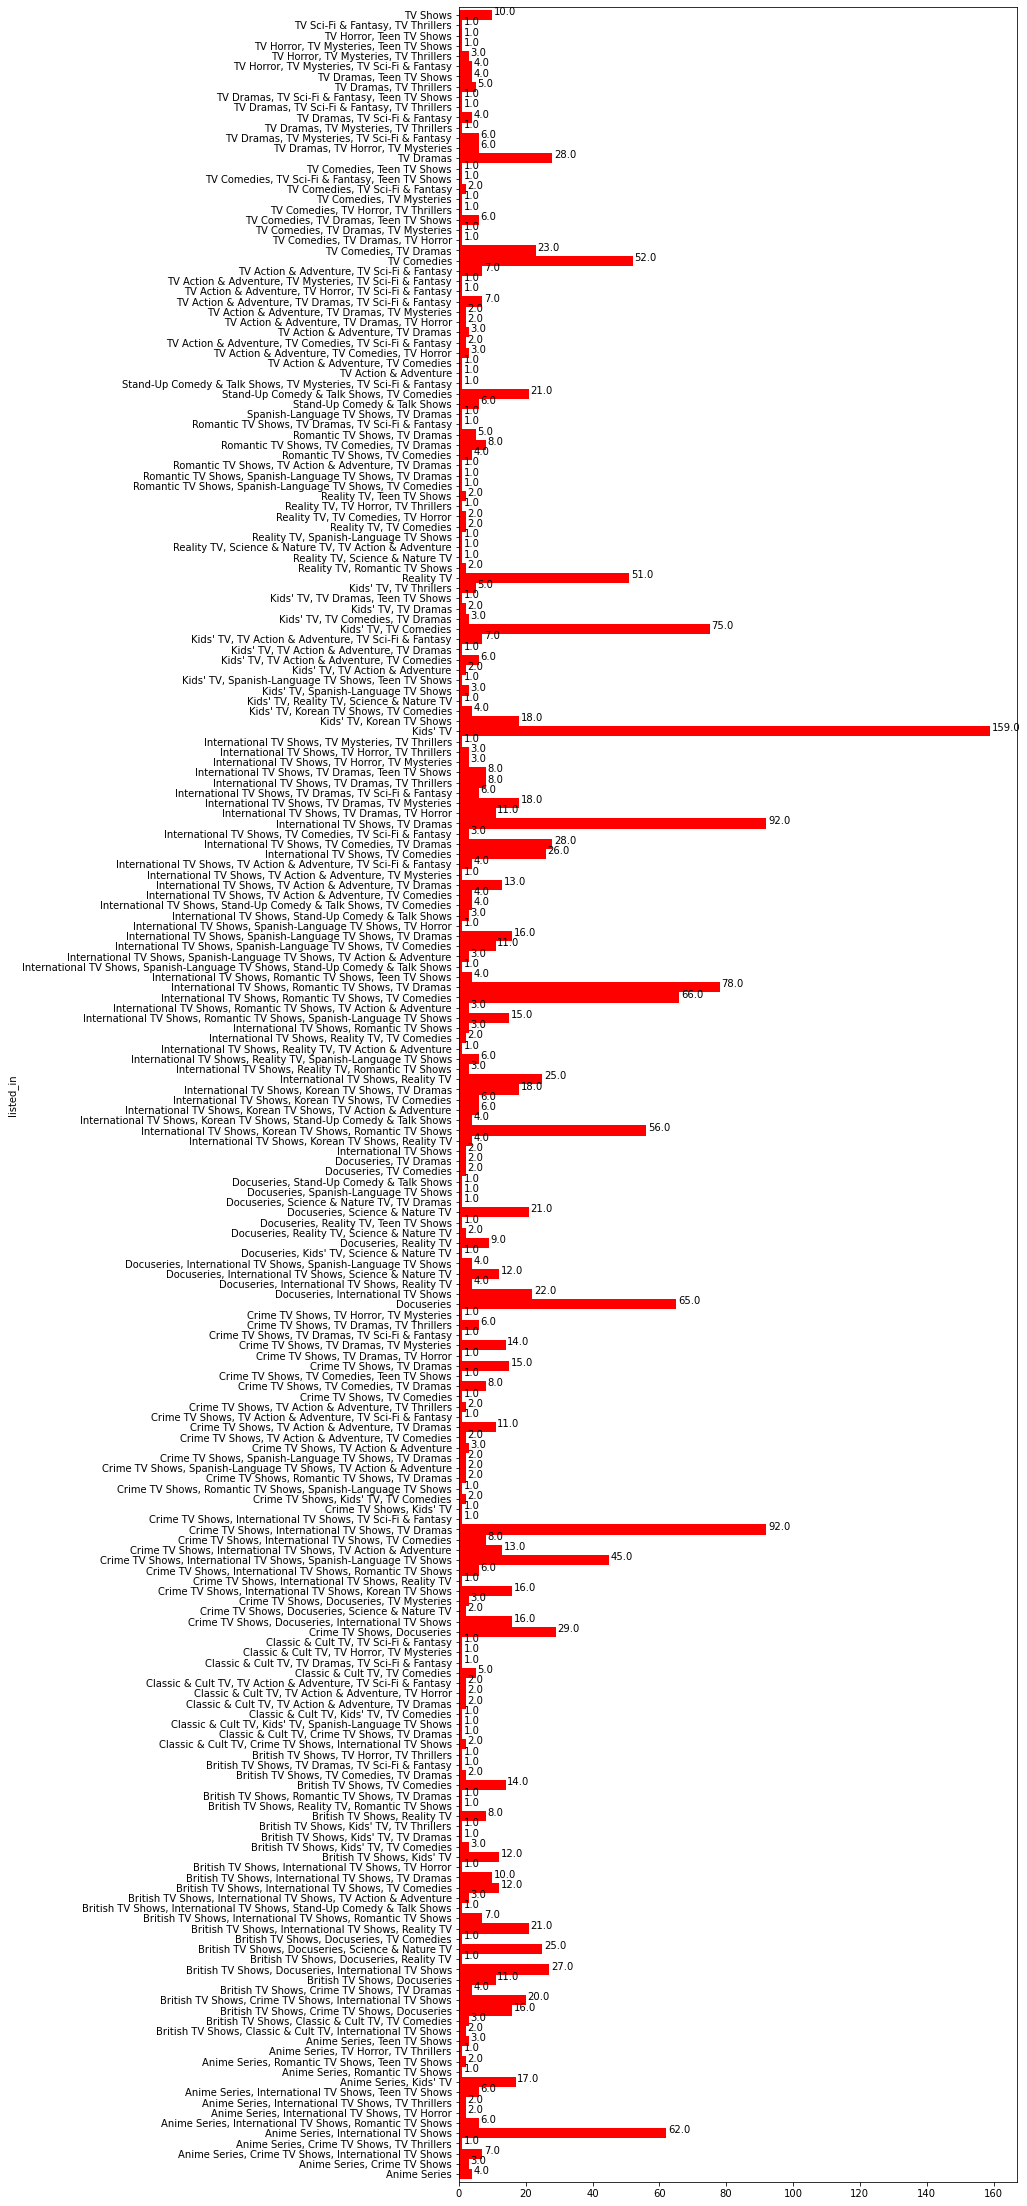

In [277]:
#creo un gráfico de barras horizonal con el nombre de los tipos de serie y el número al lado de cada barra

axes = df4.plot(kind = "barh", width = 1, stacked = "False", figsize=(10,40), color = "red")
for rect in axes.patches:
    axes.text(
    rect.get_width() +.5,
    rect.get_y() + rect.get_height() /2,
    rect.get_width(),
    fontsize= 10
)

### Ejercicio Opcional

Python es un lenguaje de programación muy utilizado en el procesamiento de imágenes. En este ejercicio veremos una aplicación de detección de elementos en una imagen de microscopía de escaneo (en inglés: Scanning Element Microscopy (SEM)).

En esta imagen se puede ver una muestra de vidrio (gris claro) con algunas burbujas (elementos negros) y granos de arena (gris oscuro). Queremos ser capaces de detectar los diferentes elementos de la muestra a partir de la imagen.

Una imagen se puede ver como una matriz bidimensional donde cada elemento de la matriz corresponde al valor de un pixel de la imagen. Por ejemplo, si miramos la matriz de la imagen que os proporcionamos, veremos valores que van de 0 a 255. Así pues, para distinguir los diferentes elementos de la muestra de vidrio, nos tendremos que fijar en el nivel de gris de los píxeles de la imagen a través del histograma. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> 


Parte A: 

* Para poder identificar mejor los elementos de la muestra de vidrio, primero hemos aplicado un filtro de mediana para reducir el ruido. Grafica ahora la distribución de los píxeles de la imagen inicial y la imagen filtrada. ¿Qué diferencia puedes apreciar entre ambas distribuciones?

**Nota:** Utiliza la función [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) de la librería Seaborn para visualizar la distribución de los valores píxeles de la imagen.

Parte B: 

* Utilizando los valores del distribution plot de la imagen filtrada, determina unos umbrales que permitan diferenciar los píxeles de arena, los píxeles de vidrio y los píxeles de burbuja.

* Una vez que hayas definido los umbrales, muestra por pantalla una imagen donde cada uno de los elementos esté en un color diferente. 


In [3]:
# Respuesta